# G&G Examples
A few more G&G examples workflows


In [15]:
# Wavelets
from scipy import signal

#numpy convolve
import numpy as np

#plotting
import matplotlib.pyplot as plt

#Kmeans Clustering
from sklearn.cluster import KMeans
import pandas as pd

#PDF and Random Numbers
from scipy.stats import norm
from scipy.stats import rv_discrete

#Regressions
from scipy import stats

## Regressions

In [38]:
x=dataframe['DT']
y=dataframe['DTS']


slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

x=np.polyfit(x,y,2)
print(x)
xp = np.linspace(0, 0.0005, 100)


[-5.78860556e+03  4.12756468e+00 -2.12088225e-04]


In [33]:
print("r-squared:", r_value**2)
print(std_err)

r-squared: 0.300326882082444
0.029803532253800235


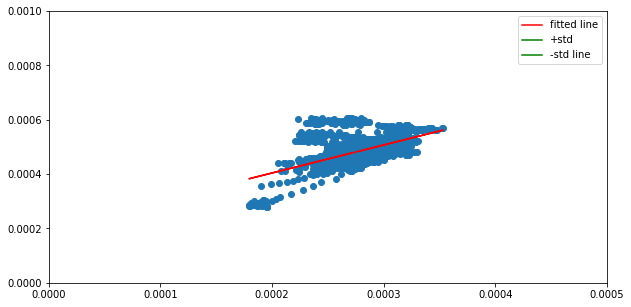

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(x,y)
plt.xlim(0,0.0005)
plt.ylim(0,0.001)

plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()

#ax.errorbar(x, y,xerr=xerr,yerr=yerr,fmt='-o')

## K Means



In [3]:
dataframe=pd.read_csv(r'.//Export.csv')

x=dataframe[['DT','DTS']].values

kmeans = KMeans(n_clusters=4, random_state=0).fit(x)
dataframe['Class']=kmeans.labels_

print(dataframe.head())

centers=kmeans.cluster_centers_
print(centers)

         DT       DTS         RHOB         GR         MD  Class
0  0.000271  0.000607  2419.800049  62.375301  3244.5960      3
1  0.000268  0.000607  2446.300049  61.171799  3244.7484      3
2  0.000270  0.000606  2464.500000  59.470299  3244.9008      3
3  0.000270  0.000606  2471.100098  55.673000  3245.0532      3
4  0.000280  0.000606  2455.800049  52.143101  3245.2056      3
[[0.00029184 0.00050046]
 [0.0002693  0.00045635]
 [0.00019502 0.00030429]
 [0.00028156 0.00056898]]


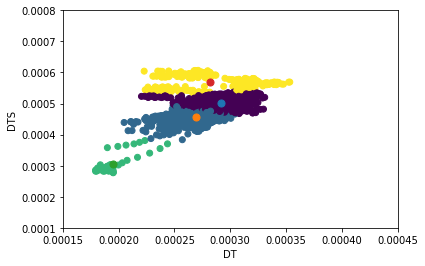

In [5]:
#print(dataframe.head())

import matplotlib.pyplot as plt

#print(centers)
#from mpl_toolkits.mplot3d import Axes3D

plt.figure
#ax = fig.add_subplot(111, projection='3d')


#ax.scatter(dataframe['DT'], dataframe['DTS'], dataframe['GR'])
plt.scatter(dataframe['DT'], dataframe['DTS'],c=dataframe['Class'])

plt.xlabel('DT')
plt.ylabel('DTS')
plt.xlim((0.00015, 0.00045))
plt.ylim((0.0001, 0.0008))
#ax.set_zlabel('GR')


for a in centers:
  #ax.scatter(a[1], a[2], a[0], marker=".",s=50)
  plt.scatter(a[0], a[1],marker=".",s=200)

## Random Numbers

(array([  3.,  24.,  81., 168., 228., 231., 157.,  76.,  25.,   7.]),
 array([0.00020609, 0.00022113, 0.00023618, 0.00025123, 0.00026628,
        0.00028132, 0.00029637, 0.00031142, 0.00032647, 0.00034151,
        0.00035656]),
 <a list of 10 Patch objects>)

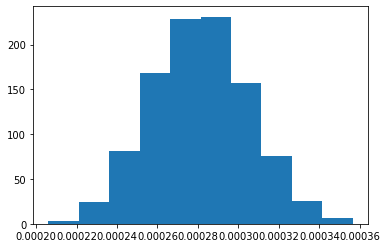

In [11]:
fig, ax = plt.subplots(1, 1)
mu=dataframe['DT'].mean()
sigma=dataframe['DT'].std()
s = np.random.normal(mu, sigma, 1000)
ax.hist(s)

## Wavelets and Convolve

100


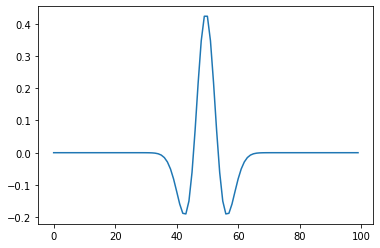

In [6]:

plt.figure


points = 100
a = 4.0
vec2 = signal.ricker(points, a)
print(len(vec2))

plt.plot(vec2)
plt.show()

500
599
599


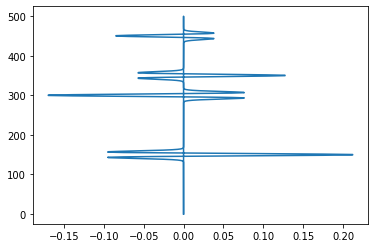

In [7]:
md=np.linspace(0, 500, num=500)
print(len(md))
values=np.zeros(500)
values[100]=0.5
values[250]=-0.4
values[300]=0.3
values[400]=-0.2

data=np.convolve(values,vec2)


mds=np.pad(md, (0,99), mode='constant', constant_values=(0))

print(len(data))
print(len(mds))

plt.figure
plt.plot(data,mds)

## FFT

In [8]:
traces=pd.read_csv('.//traces.csv')
print(traces.describe())
samples_interval=4
length=len(traces['Traces'].values)
print(length)

        Unnamed: 0       Traces          i          j
count  2502.000000  2502.000000  2502.0000  2502.0000
mean    625.000000     0.023565     1.0000     1.0000
std     361.204668     7.460081     1.0002     1.0002
min       0.000000   -42.973816     0.0000     0.0000
25%     312.250000    -1.392646     0.0000     0.0000
50%     625.000000     0.000000     1.0000     1.0000
75%     937.750000     1.544625     2.0000     2.0000
max    1250.000000    93.486420     2.0000     2.0000
2502


In [9]:
fts=np.fft.fft(traces['Traces'])

print(fts.size)

print(fts)

freq = np.fft.fftfreq(len(traces['Traces']), d=4/10e3)

2502
[58.95855388+0.j         22.40481577-7.95664118j 56.57520515+3.4085674j
 ... 18.62768655-9.98539311j 56.57520515-3.4085674j
 22.40481577+7.95664118j]


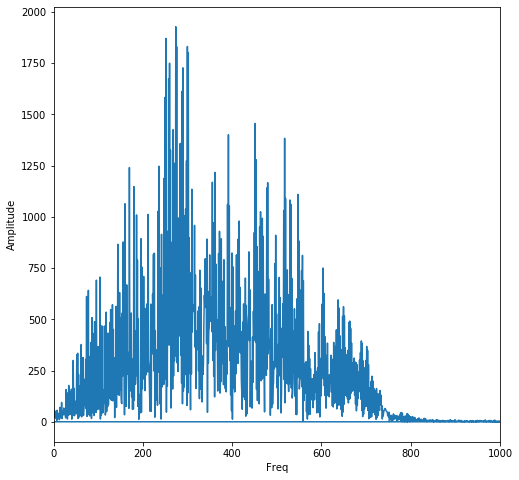

In [10]:
x, y = freq, np.abs(fts)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y)
ax.set_xlim(0, 1000)
plt.xlabel('Freq')
plt.ylabel('Amplitude')
plt.show()